In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
data = pd.read_excel('./data/pH10.xlsx')
import theano
theano.__version__

# To simulate model parameters make True
run_inference = True
data

time   V(vref)  Temperature  pH
0         0.000000  5.646661           15  10
1       229.001459  5.646723           15  10
2       459.000006  5.646760           15  10
3       688.664300  5.646791           15  10
4       910.053687  5.646818           15  10
5      1139.001983  5.646843           15  10
6      1369.000011  5.646866           15  10
7      1599.000000  5.646888           15  10
8      1820.161061  5.646907           15  10
9      2049.003032  5.646927           15  10
10     2279.000021  5.646945           15  10
11     2509.000000  5.646963           15  10
12     2730.375810  5.646979           15  10
13     2959.005129  5.646996           15  10
14     3189.000042  5.647012           15  10
15     3419.000000  5.647027           15  10
16     3640.805306  5.647041           15  10
17     3869.009323  5.647056           15  10
18     4099.000083  5.647069           15  10
19     4329.000001  5.647083           15  10
20     4551.664300  5.647096           15  10
21     4779.017712  5.647109           15  10
22     5009.000165  5.647121           15  10
23     5239.000001  5.647133           15  10
24     5462.664300  5.647145           15  10
25     5689.034489  5.647157           15  10
26     5919.000329  5.647168           15  10
27     6149.000001  5.647179           15  10
28     6373.664300  5.647190           15  10
29     6599.068043  5.647201           15  10
...            ...       ...          ...  ..
9792  36869.000001  6.624883           65  10
9793  37092.664300  6.624883           65  10
9794  37319.034489  6.624883           65  10
9795  37549.000329  6.624883           65  10
9796  37779.000001  6.624883           65  10
9797  38003.664300  6.624883           65  10
9798  38229.068043  6.624883           65  10
9799  38459.000656  6.624883           65  10
9800  38689.000001  6.624883           65  10
9801  38914.664300  6.624883           65  10
9802  39139.135152  6.624883           65  10
9803  39369.001000  6.624883           65  10
9804  39599.000002  6.624883           65  10
9805  39825.664300  6.624883           65  10
9806  40049.269370  6.624883           65  10
9807  40279.001066  6.624883           65  10
9808  40509.000002  6.624883           65  10
9809  40736.664300  6.624883           65  10
9810  40959.537806  6.624883           65  10
9811  41189.001197  6.624883           65  10
9812  41419.000003  6.624883           65  10
9813  41647.664300  6.624883           65  10
9814  41870.000000  6.624883           65  10
9815  42099.001459  6.624883           65  10
9816  42329.000006  6.624883           65  10
9817  42558.664300  6.624883           65  10
9818  42780.053687  6.624883           65  10
9819  43009.001983  6.624883           65  10
9820  43198.664300  6.624883           65  10
9821  43199.000000  6.624883           65  10

[9822 rows x 4 columns]

In [8]:
# adding a column of minutes in the data
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//60) 
    
data['minute'] = mins

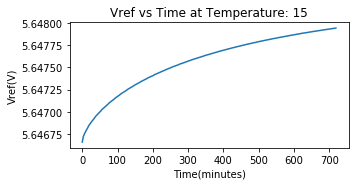

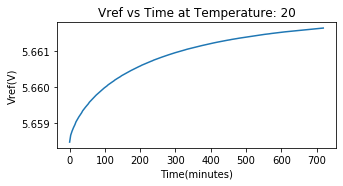

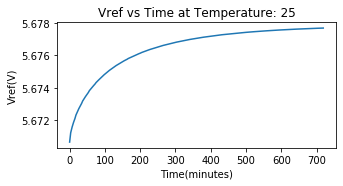

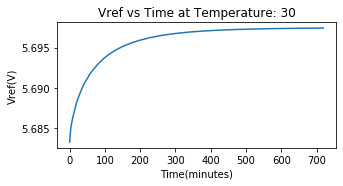

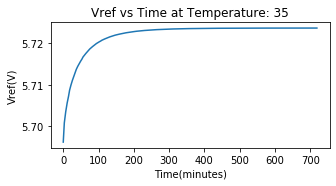

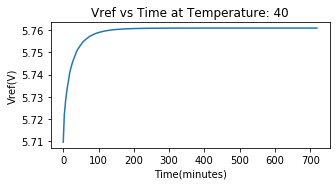

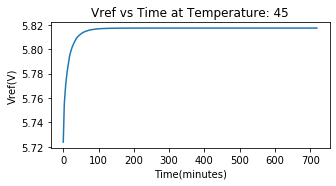

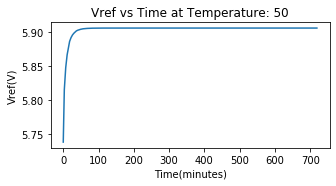

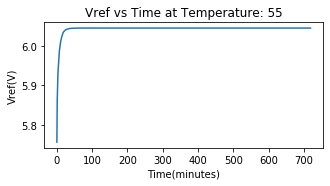

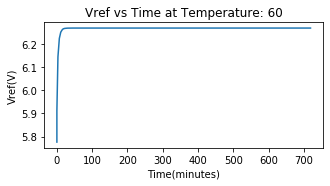

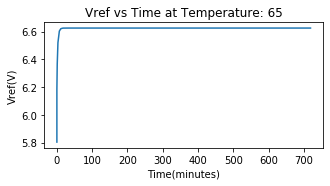

In [9]:
# plotting vref vs time plot for temperature in range 15 to 65 with a gap of 5 deg C

count = 1
for T in range(15,66,5):
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']
    fig = plt.figure(figsize=(5,30))
    plt.subplot(11,1,count)
    plt.plot(time,vref)
    plt.title("Vref vs Time at Temperature: %s" %T)
    plt.xlabel('Time(minutes)')
    plt.ylabel('Vref(V)')
    count += 1

In [10]:
'''
Initializing model
Vref = epsilon - alpha * exp(-beta*time)
'''

def inferring_parameters(time, vref):
    model_isfet = pm.Model()
    
    with model_isfet:
        alpha = pm.Uniform('alpha',0,15)
        beta = pm.Uniform('beta',0,15)
        epsilon = pm.Uniform('epsilon', 0,20)
        sd_vref = pm.Uniform('vref_sd', 0,1)
        voltage = pm.Normal('Voltage',mu = epsilon - alpha*np.exp(-beta*time), sigma=sd_vref,observed=vref)
        step = pm.Metropolis()
        trace = pm.sample(200000, step=step)
    
    return trace

In [ ]:
Traces = {}
if run_inference == True:
    for T in range(15,66,5):
        print("Working on Temperaure: ", T)
        time = data[data['Temperature'] == T]['minute']
        vref = data[data['Temperature'] == T]['V(vref)']
        trace = inferring_parameters(time, vref)
        Traces[T] = trace
    
    for k in Traces.keys():
        df = pm.backends.tracetab.trace_to_dataframe(Traces[k])
        df.to_csv(str(k)+'_trace.csv')
        print('saved traces!')

for T in range(15,66,5):
    Traces[T] = pd.read_csv('../Trace/%s_trace.csv'%T, index_col=0)

Working on Temperaure:  15


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains:  44%|█████████████████████▎                           | 348924/802000 [1:12:42<1:31:02, 82.95draws/s]

In [ ]:
count = 0
for T in range(15,66,5):
    alpha_samples = Traces[T]["alpha"][400000:]
    beta_samples = Traces[T]["beta"][400000:]
    epsilon_samples = Traces[T]["epsilon"][400000:]

    fig = plt.figure(figsize=(10, 10))
    #histogram of the samples:
    plt.subplot(11,3,3*count+1)
    plt.title(r"Temperature:%s --Posterior distributions of the variables $\alpha$, $\beta$, and $\epsilon$"%T)
    plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
             label=r"posterior of $\alpha$", color="#A60628", normed=True)
    plt.legend();

    plt.subplot(11,3,3*count+2)
    plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
             label=r"posterior of $\beta$", color="#7A68A6", normed=True)
    plt.legend()

    plt.subplot(11,3,3*count+3)
    plt.hist(epsilon_samples, histtype='stepfilled', bins=35, alpha=0.85,
             label=r"posterior of $\epsilon$", color="#A60628", normed=True)
    plt.legend();
    count += 1   

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

Te = []
ev = []
r2 = []
mse = []
mae = []
count = 1
for T in range(15,66,5):
    alpha_samples = Traces[T]["alpha"][100000:]
    beta_samples = Traces[T]["beta"][100000:]
    epsilon_samples = Traces[T]["epsilon"][100000:]
    
    epsilon_mean = epsilon_samples.mean()
    alpha_mean = alpha_samples.mean()
    beta_mean = beta_samples.mean()
    
    #From data
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']

    #predictied
    vref_pred = epsilon_mean - alpha_mean*np.exp(-beta_mean*time)

    fig = plt.figure(figsize=(5, 30))
    plt.subplot(11,1,count)
    plt.title(r"Temperature:%s-True(red) vs Predicted (green)$"%T)
    plt.xlabel('$Time (minutes)$')
    plt.ylabel('Vref (V)')
    plt.plot(time, vref, 'r', time, vref_pred, 'g')
    
    #Errors
    Te.append(T)
    ev.append(explained_variance_score(vref, vref_pred))
    r2.append(r2_score(vref, vref_pred))
    mse.append(mean_squared_error(vref, vref_pred))
    mae.append(mean_absolute_error(vref, vref_pred))
    
    count += 1
    
#Saving the results
errors = pd.DataFrame()
errors['Temperature'] = Te
errors['Explained_variance'] = ev
errors['R2'] = r2
errors['MSE'] = mse
errors['MAE'] = mae

errors.to_csv('Results.csv')

In [ ]:
print(errors)